## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
import pickle 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Dipak Mani

## Importing the dataset

In [2]:
cars = pd.read_csv('car data.csv')

The datasets consist of several independent variables include:

𝐂𝐚𝐫_𝐍𝐚𝐦𝐞 : This column should be filled with the name of the car.

𝐘𝐞𝐚𝐫 : This column should be filled with the year in which the car was bought.

𝐒𝐞𝐥𝐥𝐢𝐧𝐠_𝐏𝐫𝐢𝐜𝐞 : This column should be filled with the price the owner wants to sell the car at.

𝐏𝐫𝐞𝐬𝐞𝐧𝐭_𝐏𝐫𝐢𝐜𝐞 : This is the current ex-showroom price of the car.

𝐊𝐦𝐬_𝐃𝐫𝐢𝐯𝐞𝐧 :This is the distance completed by the car in km.

𝐅𝐮𝐞𝐥_𝐓𝐲𝐩𝐞 : Fuel type of the car i.e Diesel,Petrol,CNG

𝐒𝐞𝐥𝐥𝐞𝐫_𝐓𝐲𝐩𝐞 : Defines whether the seller is a dealer or an individual.

𝐓𝐫𝐚𝐧𝐬𝐦𝐢𝐬𝐬𝐢𝐨𝐧 : Defines whether the car is manual or automatic.

𝐎𝐰𝐧𝐞𝐫 : Defines the number of owners the car has previously had.

In [3]:
#Top 5 rows
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#last 5 rows
cars.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
# Check columns
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], dtype='object')

In [6]:
# Drop column Car_Name
cars.drop(['Car_Name'],axis=1,inplace = True)

In [7]:
# check rows and columns
cars.shape

(301, 8)

In [8]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# Check how many duplicates
cars[cars.duplicated()]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [11]:
# Check null and Dtypes
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [12]:
#check which column numerical, categorical
cars.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [13]:
# Check missing values or not
cars.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Plot the Target variable

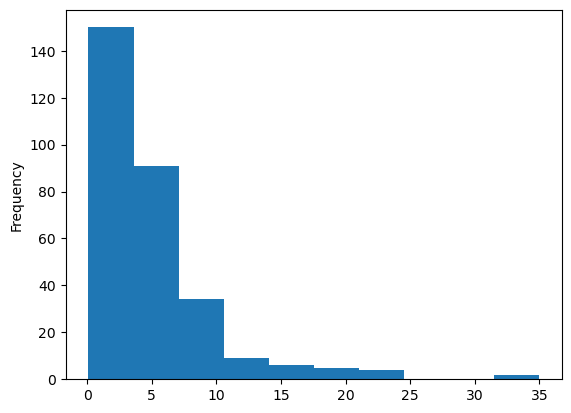

In [14]:
# Ploting a histogram
cars['Selling_Price'].plot(kind='hist')
plt.show()

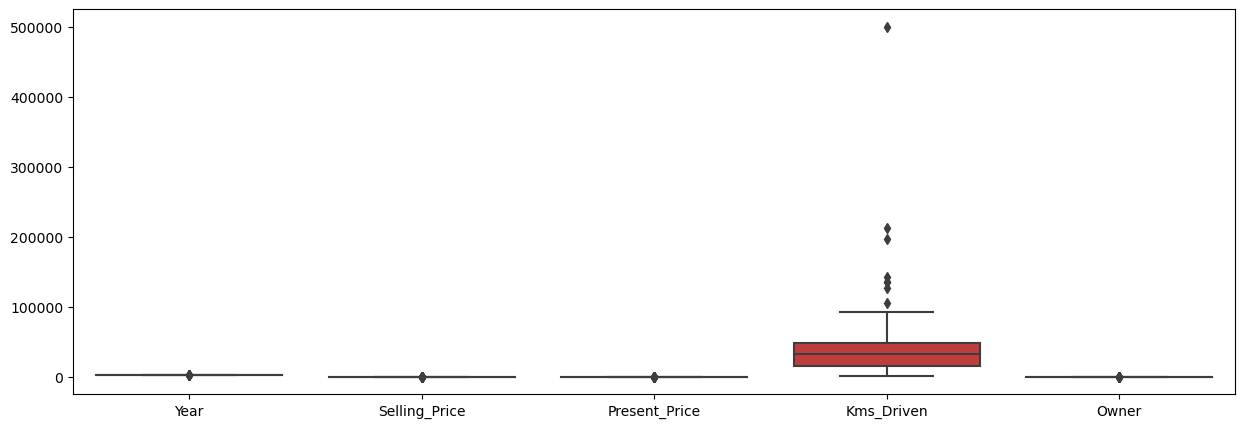

In [15]:
# Year
plt.figure(figsize = (15,5))
sns.boxplot(data=cars)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Density'>

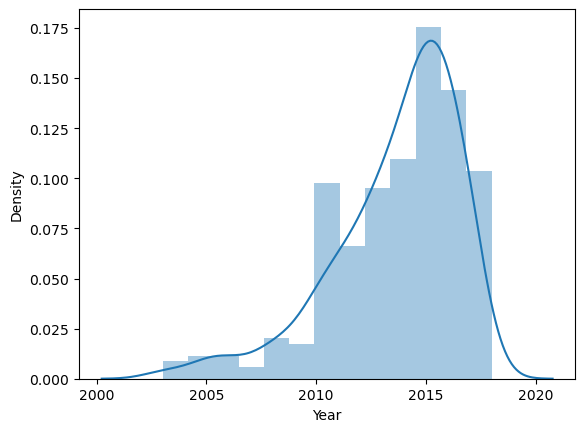

In [16]:
sns.distplot(cars['Year'])

In [17]:
# The Years variable is left skewed

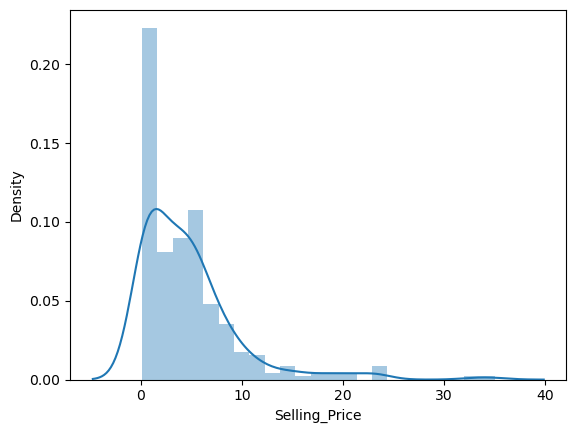

In [20]:
sns.distplot(cars['Selling_Price'])
plt.show()

## Create a pair plot of entire data

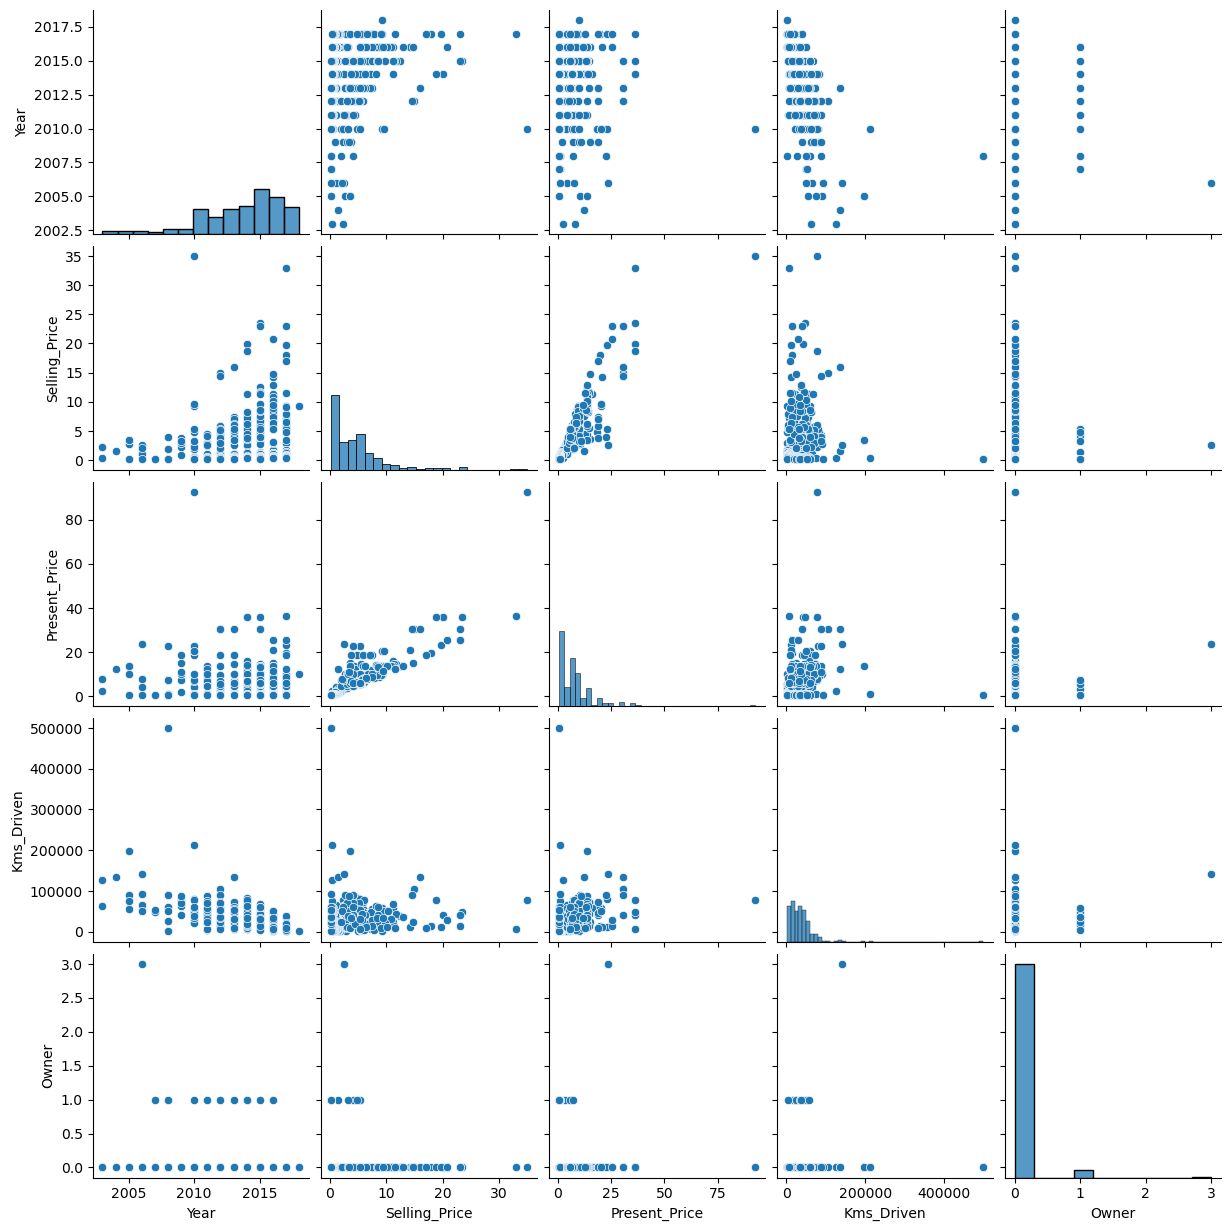

In [21]:
sns.pairplot(cars)
plt.show()

Present price and selling price has a strong relationship

## Verify our observations finding the correlation of data

In [22]:
cars.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


## Converting categorical variables to dummy variables

In [23]:
#Fuel_Type

cars.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [24]:
cars.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [25]:
cars.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [26]:
cars = pd.get_dummies(cars,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [27]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    301 non-null    int64  
 1   Selling_Price           301 non-null    float64
 2   Present_Price           301 non-null    float64
 3   Kms_Driven              301 non-null    int64  
 4   Owner                   301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [28]:
cars.shape

(301, 9)

In [29]:
cars.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


## Create a new feature which tells us how old the car is in terms of years

In [30]:
# Substracting the year by current year
cars['no_of_years'] = 2021 - cars['Year']

In [31]:
cars.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,no_of_years
0,2014,3.35,5.59,27000,0,0,1,0,1,7
1,2013,4.75,9.54,43000,0,1,0,0,1,8
2,2017,7.25,9.85,6900,0,0,1,0,1,4
3,2011,2.85,4.15,5200,0,0,1,0,1,10
4,2014,4.60,6.87,42450,0,1,0,0,1,7


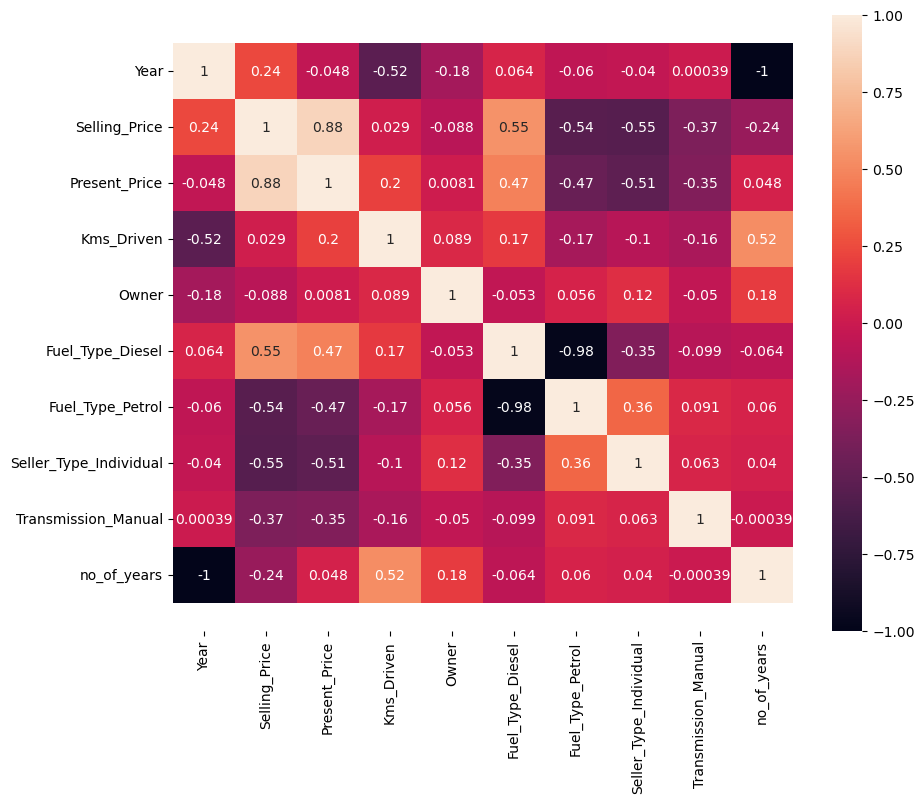

In [32]:
#Heatmap to show the correlation between various variables of the dataset

plt.figure(figsize=(10, 8))
cor = cars.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The target variable Selling Price is highly correlated with:

Present Price
Fuel Type
Seller Type

## Linear Regression Model

In [33]:
y = cars['Selling_Price']
X = cars.drop(['Selling_Price'],axis=1)

In [34]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(210, 9)
(91, 9)
(91,)


In [35]:
#standardization of the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler() 
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)

X_test=sc.fit_transform(X_test)

In [36]:
#Building model using sklearn(Gradient Descent)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # training the algorithm

# Getting the coefficients and intercept

print('coefficients:\n', lin_reg.coef_)
print('\n intercept:', lin_reg.intercept_)
#coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])  
#print(coeff_df)

#Now predicting on the test data
y_pred = lin_reg.predict(X_test)

coefficients:
 [ 0.61446061  4.0342602  -0.18209819  0.07808457  0.87226802  0.17314277
 -0.52312819 -0.6032581  -0.61446061]

 intercept: 4.748809523809541


In [37]:
# compare the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.reset_index(inplace=True,drop=True)
df

,Actual,Predicted
0,7.40,8.139241
1,4.00,2.768482
2,0.50,-1.084232
3,3.15,4.108869
4,1.25,0.093750
5,5.75,6.058557
6,0.75,1.635044
7,2.65,2.401599
8,8.40,8.584556
9,0.48,0.542876
